# AQUAthon 

- [Global mean time series](#global-mean-time-series)
- [Ocean3D diagnostic](#ocean3d-diagnostic)
- [Atmospheric global mean biases diagnostic](#atmospheric-global-mean-biases-diagnostic)

<details>
  <summary>⚠️ <span style="color: red;">Disclaimer</span></summary>

> A major refactoring of diagnostics is underway, so be aware that this information may change. 
>  
> Each scientific diagnostic has been developed by different contributors, leading to variations in usage and structure. We are currently standardizing the diagnostics with clear requirements for implementation, documentation, and usage.  
>  
> Within the next month, there will be changes to how diagnostics are used.  
  
</details>

In [21]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Global mean time series

Main authors:
- Matteo Nurisso (CNR, m.nurisso@isac.crn.it)

The **Global Time Series** diagnostic performs three key analyses:
- **Timeseries**: Computes global mean time series for a variable or formula across models, with optional comparison to reference datasets.
- **GregoryPlot**: Generates Gregory-like plots for models, showing relationships between temperature and radiation fluxes, with optional comparisons to reference datasets.
- **SeasonalCycle**: Computes the seasonal cycle of a variable, with optional comparisons to reference datasets.

#### Input Variables
For **GregoryPlot**, required variables include:
- `2t` (2m temperature)
- `mtnlwrf` (Net long-wave radiation flux)
- `mtnswrf` (Net short-wave radiation flux)

The `Timeseries` class provides an easy interface to plot gloabl time series for a given list of experiments and a variable or formula.


In [4]:
from global_time_series import Timeseries

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class Timeseries:
    """
    Plot a time series of the global mean value for a given variable.

    Args:
        var (str): Variable name.
        formula (bool): If True, derive the variable from others. Default is False.
        catalogs (list or str): Catalog IDs.
        models (list or str): Model IDs.
        exps (list or str): Experiment IDs.
        sources (list or str): Source IDs.
        regrid (str): Regrid resolution. Default is None.
        plot_ref (bool): Include reference data. Default is True.
        startdate (str): Start date. Default is None.
        enddate (str): End date. Default is None.
        annual (bool): Plot annual mean. Default is True.
        monthly_std (bool): Plot monthly standard deviation. Default is True.
        annual_std (bool): Plot annual standard deviation. Default is True.
        lon_limits (list): Longitude limits. Default is None.
        lat_limits (list): Latitude limits. Default is None.
        save (bool): Save the figure. Default is True.
        outdir (str): Output directory. Default is './'.
        outfile (str): Output file name. Default is None.
        loglevel (str): Log level. Default is "WARNING".
    """

    def run(self):
        """Retrieve data, reference, and generate the plot."""
        pass
```
</details>

In [5]:
# 0 s
ts = Timeseries(var='2t', models='IFS-NEMO', exps='historical-1990', sources='lra-r100-monthly',
                startdate='1990-01-01', enddate='1999-12-01',
                std_startdate='1990-01-01', std_enddate='1999-12-01', extend=False,
                loglevel='INFO')

By default the `Timeseries` class will use `ERA5` as the reference dataset, but you can change it by setting the `plot_ref_kw` parameter to the desired dataset.

The timeseries is generated, plot and saved by running the `run` method of the `Timeseries` class.
By default monthly and annual mean are evaluated, but you can change it by setting the parameter to `monthly=False` or `annual=False`.
The reference data can be plotted by setting the `plot_ref=True` parameter.

2024-09-11 07:27:47 :: Timeseries :: INFO     -> Retrieving data for None IFS-NEMO historical-1990 lra-r100-monthly
2024-09-11 07:27:47 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-11 07:27:48 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-11 07:27:48 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-11 07:27:48 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-11 07:27:48 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-11 07:27:48 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-09-11 07:27:48 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-11 07:27:48 :: Reader :: WARNING  -> No fi

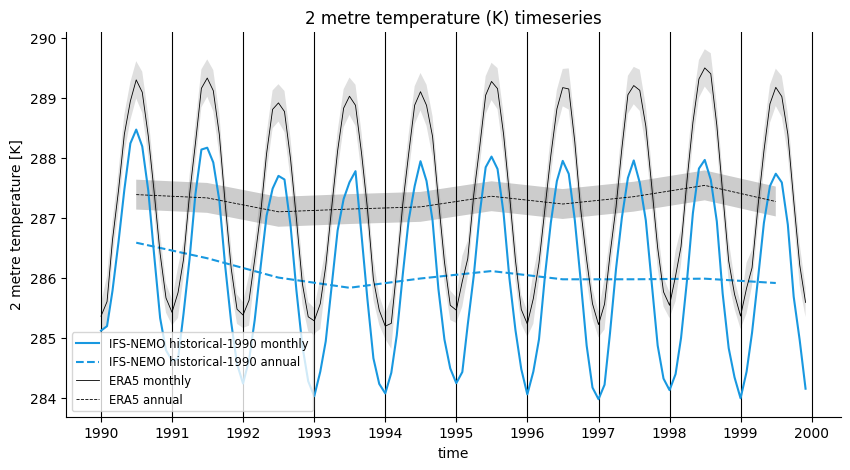

In [6]:
# 1 m, 12 s
ts.run()

Furthermore, the user can also combine time series and plot them against each other. The resulting "Gregory"-like plot allows the user to investigate the annual cycle as well as to detect model drift (if existing).

In [7]:
from global_time_series import GregoryPlot

Also in this case we have a simple class defined. The `GregoryPlot` class provides an easy interface to plot the Gregory-like plot for a given list of experiments.

The comparison is done against ERA5 for the 2m temperature and CERES for the TOA net fluxes.

By default both monthly and annual cycles are plotted, but the user can choose to plot only one of them by setting the `monthly` and `annual` parameters to `True` or `False`.

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class GregoryPlot:
    """
    Create and plot a Gregory plot with optional reference data.

    Args:
        catalogs (list, opt): List of catalogs to search for data.
        models (list): List of model IDs.
        exps (list): List of experiment IDs.
        sources (list): List of source IDs.
        monthly (bool): Plot monthly data. Default is True.
        annual (bool): Plot annual data. Default is True.
        regrid (str): Optional regrid resolution.
        ts_name (str): Variable name for 2m temperature. Default is '2t'.
        toa_name (list): Variable names for net radiation at TOA. Default is ['mtnlwrf', 'mtnswrf'].
        ts_std_start (str): Start date for 2m temperature standard deviation. Default is '1980-01-01'.
        ts_std_end (str): End date for 2m temperature standard deviation. Default is '2010-12-31'.
        toa_std_start (str): Start date for net radiation at TOA standard deviation. Default is '2001-01-01'.
        toa_std_end (str): End date for net radiation at TOA standard deviation. Default is '2020-12-31'.
        ref (bool): Include reference data. Default is True (ERA5 for 2m temperature, CERES for net radiation).
        save (bool): Save the figure. Default is True.
        outdir (str): Output directory. Default is './'.
        outfile (str): Output file name. Default is None.
        loglevel (str): Logging level. Default is 'WARNING'.
    """

    def run(self):
        """
        Retrieve reference data, retrieve model data, and generate the Gregory plot.
        """
        pass
```
</details>

In [8]:
# 0 s
gp = GregoryPlot(models=['ICON','ICON'], exps=['historical-1990', 'ssp370'], sources=['lra-r100-monthly', 'lra-r100-monthly'],
            loglevel='INFO', monthly=False, annual=True)

2024-09-11 07:29:14 :: Gregory plot :: INFO     -> Retrieving data for None ICON historical-1990 lra-r100-monthly
2024-09-11 07:29:15 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-11 07:29:15 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-11 07:29:15 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-11 07:29:15 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-11 07:29:15 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-11 07:29:15 :: Reader :: INFO     -> Fix names in metadata is icon-destine-v1-hist-lra
2024-09-11 07:29:15 :: Reader :: INFO     -> Fix names icon-destine-v1-hist-lra found in fixes files
2024-09-11 07:29:15 :: Reader :: INFO     -> Parent fix icon-destine-v1 found! Mergin with fixer

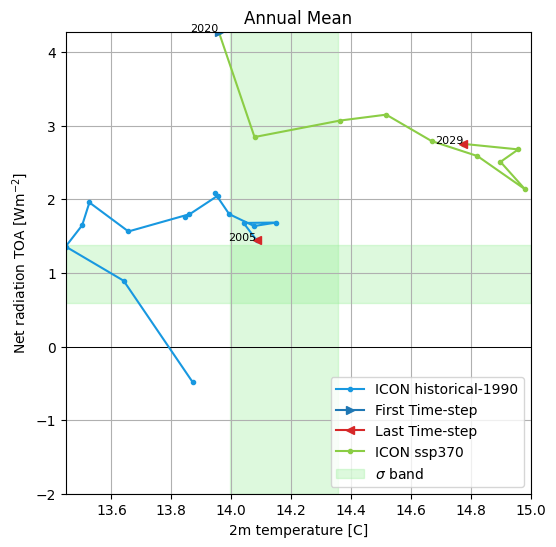

In [9]:
# 1 m, 30 s 
gp.run()

The `SeasonalCycle` class is a derivation of the `Timeseries` class  and provides an easy interface to plot seasonal cycles for a given list of experiments and a variable or formula.

In [12]:
from global_time_series import SeasonalCycle

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class SeasonalCycle(Timeseries):
    """
    Extract the seasonal cycle of a variable from a time series.

    Args:
        var (str): Variable name for the seasonal cycle.
        formula (bool): If True, derive the variable from other variables.
        catalogs (list or str): Catalog IDs to search for the data.
        models (list or str): Model IDs.
        exps (list or str): Experiment IDs.
        sources (list or str): Source IDs.
        regrid (str): Optional regrid resolution. Default is None.
        plot_ref (bool): Plot reference seasonal cycle. Default is True.
        plot_ref_kw (dict): Keyword arguments for the reference plot. Default is {'model': 'ERA5', 'exp': 'era5', 'source': 'monthly'}.
        startdate (str): Start date for the time series.
        enddate (str): End date for the time series.
        std_startdate (str): Start date for standard deviation calculation.
        std_enddate (str): End date for standard deviation calculation.
        plot_kw (dict): Keyword arguments for plot customization.
        save (bool): Save the figure. Default is True.
        outdir (str): Output directory. Default is './'.
        outfile (str): Output file name. Default is None.
        longname (str): Long name of the variable. Default is None.
        units (str): Units of the variable. Default is None.
        lon_limits (list): Longitude limits for the evaluation. Default is None.
        lat_limits (list): Latitude limits for the evaluation. Default is None.
        loglevel (str): Logging level. Default is 'WARNING'.
    """

    def run(self):
        """Retrieve data and generate the seasonal cycle plot."""
        pass
```
</details>


In [13]:
# 0 s
sc = SeasonalCycle(var='2t', models='IFS-NEMO', exps='historical-1990', sources='lra-r100-monthly',
                   startdate='1990-01-01', enddate='1999-12-31',
                   std_startdate='1990-01-01', std_enddate='1999-12-31',
                   save=False, loglevel='INFO')

2024-09-11 07:31:37 :: Timeseries :: INFO     -> Figure will not be saved
2024-09-11 07:31:37 :: SeasonalCycle :: INFO     -> SeasonalCycle class initialized


By default the `SeasonalCycle` class will use `ERA5` as the reference dataset, but you can change it by setting the `plot_ref_kw` parameter to the desired dataset.

The seasonalcycle is generated, plot and saved by running the `run` method of the `SeasonalCycle` class.

2024-09-11 07:31:37 :: SeasonalCycle :: INFO     -> Retrieving data for None IFS-NEMO historical-1990 lra-r100-monthly
2024-09-11 07:31:37 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2024-09-11 07:31:37 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-11 07:31:37 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-11 07:31:37 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-11 07:31:37 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-11 07:31:37 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-09-11 07:31:37 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-11 07:31:37 :: Reader :: WARNING  -> No

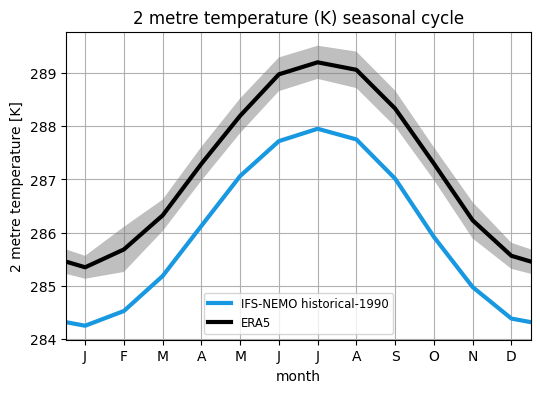

In [14]:
# 35 s
sc.run()

Similarly to the `Timeseries` class, the `SeasonalCycle` class can evaluate the seasonal cycle over a specified region by setting the `lon_limits` and `lat_limits` parameters (e.g. `lon_limits=[-180, 180]`, `lat_limits=[-90, 90]`).

## Ocean3D diagnostic

Main authors: 
- Supriyo Ghosh (BSC, supriyo.ghosh@bsc.es)
- Pablo Ortega (BSC, pablo.ortega@bsc.es)

### Description

The **Ocean3D** diagnostic package consists of two main submodules designed to monitor and evaluate the 3D ocean evolution and mean state:

- **Ocean Drifts**: Characterizes and monitors model drifts.
- **Ocean Circulation**: Evaluates the realism of the model in simulating key aspects of ocean circulation.

Both submodules support single and multi-model diagnostics for analyzing and comparing different model experiments.


Importing  Modules

In [15]:
# 1s
from aqua import Reader
from ocean3d import check_variable_name
from ocean3d import hovmoller_plot
from ocean3d import time_series

from ocean3d import multilevel_trend
from ocean3d import zonal_mean_trend

Here we read one of the reference NextGEMS Cycle 3 simulations
And we extract the Potential Temperature and Practical Salinity fields, resampling in yearly means (as these are more adequate to identify drifts as they are not contaminated by seasonal cycle signals)

In [16]:
# 30 s
reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")

data = reader.retrieve(startdate= "1997", enddate= "2000").resample(time="1Y").mean()
data = check_variable_name(data)

2024-09-11 07:32:05 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-11 07:32:05 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-11 07:32:05 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-11 07:32:05 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-11 07:32:05 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-11 07:32:05 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-09-11 07:32:10 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC


In [17]:
# 0 s
o3d_request = {
    'model': 'IFS-NEMO',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly',
    'data': data,
    'region': 'Atlantic Ocean',
    'latS': None,
    'latN': None,
    'lonW': None,
    'lonE': None,
    'output': True,
    'output_dir': './output'
}


### hovmoller_plot

`hovmoller_plot(o3d_request)`

This function generates **Hovmoller plots** of ocean potential temperature and salinity over time and depth. It is mainly used to monitor potential drifts at different ocean levels by averaging values spatially over predefined or custom regions.

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class hovmoller_plot:
    """
    A class for generating Hovmoller plots from ocean3d data.

    Args:
        o3d_request: Request object containing necessary data for plot generation.

    Attributes:
        - data (xarray.Dataset): The model data, including 3D ocean potential temperature and salinity.
        - region (str): The region over which the spatial average is computed.
        - lat_s, lat_n, lon_w, lon_e: Custom latitude and longitude boundaries for spatial averaging.
        - output_dir (str): The directory where the output plots will be saved.
        - plot_info (dict): Contains processed data and plot configuration details.
    """

    def plot(self):
        """
        Generate and display the Hovmoller plot.

        Args:
            None
        """
        pass
```
</details>

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region over which the spatial average is computed (or to provide a custom latxlon box instead)

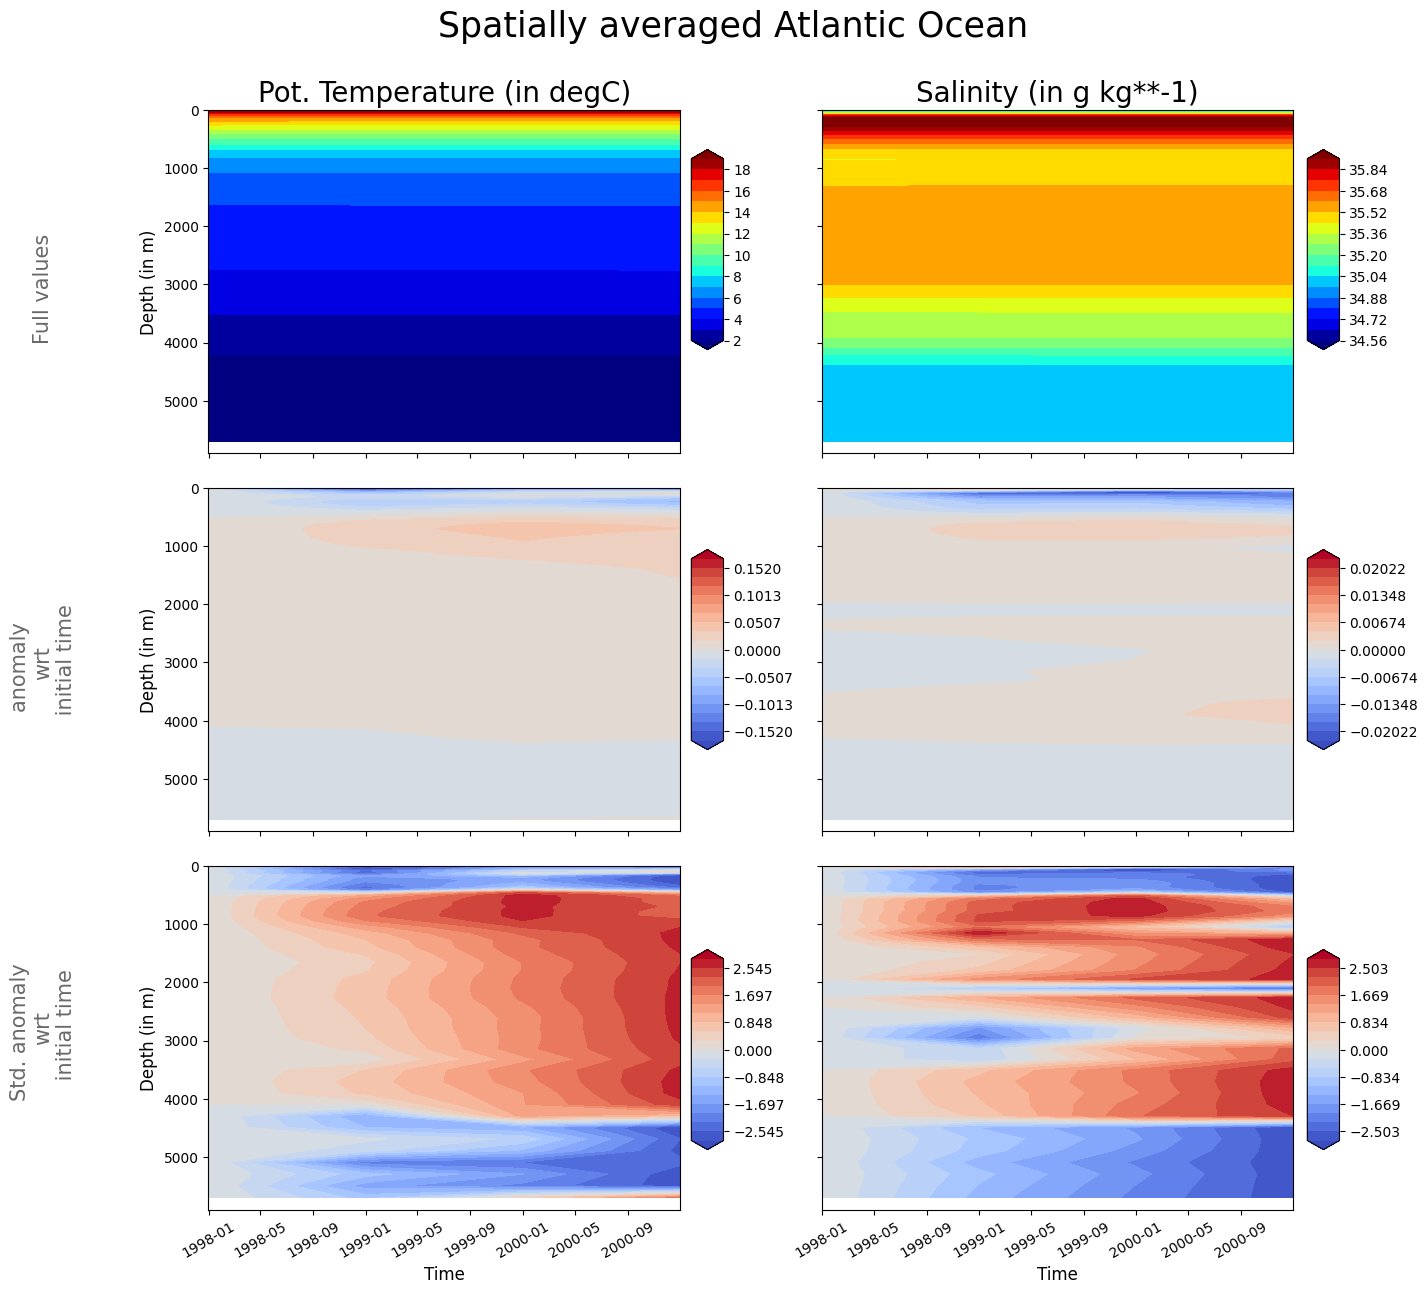

In [18]:
# 1 m, 20 s
hovmoller_plot_init = hovmoller_plot(o3d_request)
hovmoller_plot_init.plot() 

### multilevel_trend

`multilevel_trend(o3d_request)`

This function generates **plots of linear trends** for ocean temperature and salinity at different vertical levels, helping to identify regions and depths where strong trends or potential drifts are developing. 

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class multilevel_trend:
    """
    Class to generate plots showing linear trends in ocean temperature and salinity at different depths.

    Args:
        o3d_request (object): Object containing necessary data for trend analysis and plotting.

    Attributes:
        - data (xarray.Dataset): The dataset with 3D ocean temperature (avg_thetao) and salinity (avg_so).
        - region (str): The region for spatial averaging or custom lat-lon box.
        - levels (list): Selected vertical levels for plotting. Default is [10, 100, 500, 1000, 3000, 5000].
        - output_dir (str): Directory for storing output figures.
        - loglevel (str): The logging level for messages during execution.

    Methods:
        - `plot()`: Generates the multilevel trend plot for ocean temperature and salinity at the specified vertical levels.
    """
```
</details>

It requires you to provide: 
- A file with model data of 3D ocean potential temperature and practical salinity
- The specific region to be shown in the plots
- The choice on the vertical levels to include in the plot (by default: 10, 100, 500, 1000, 3000, 5000)

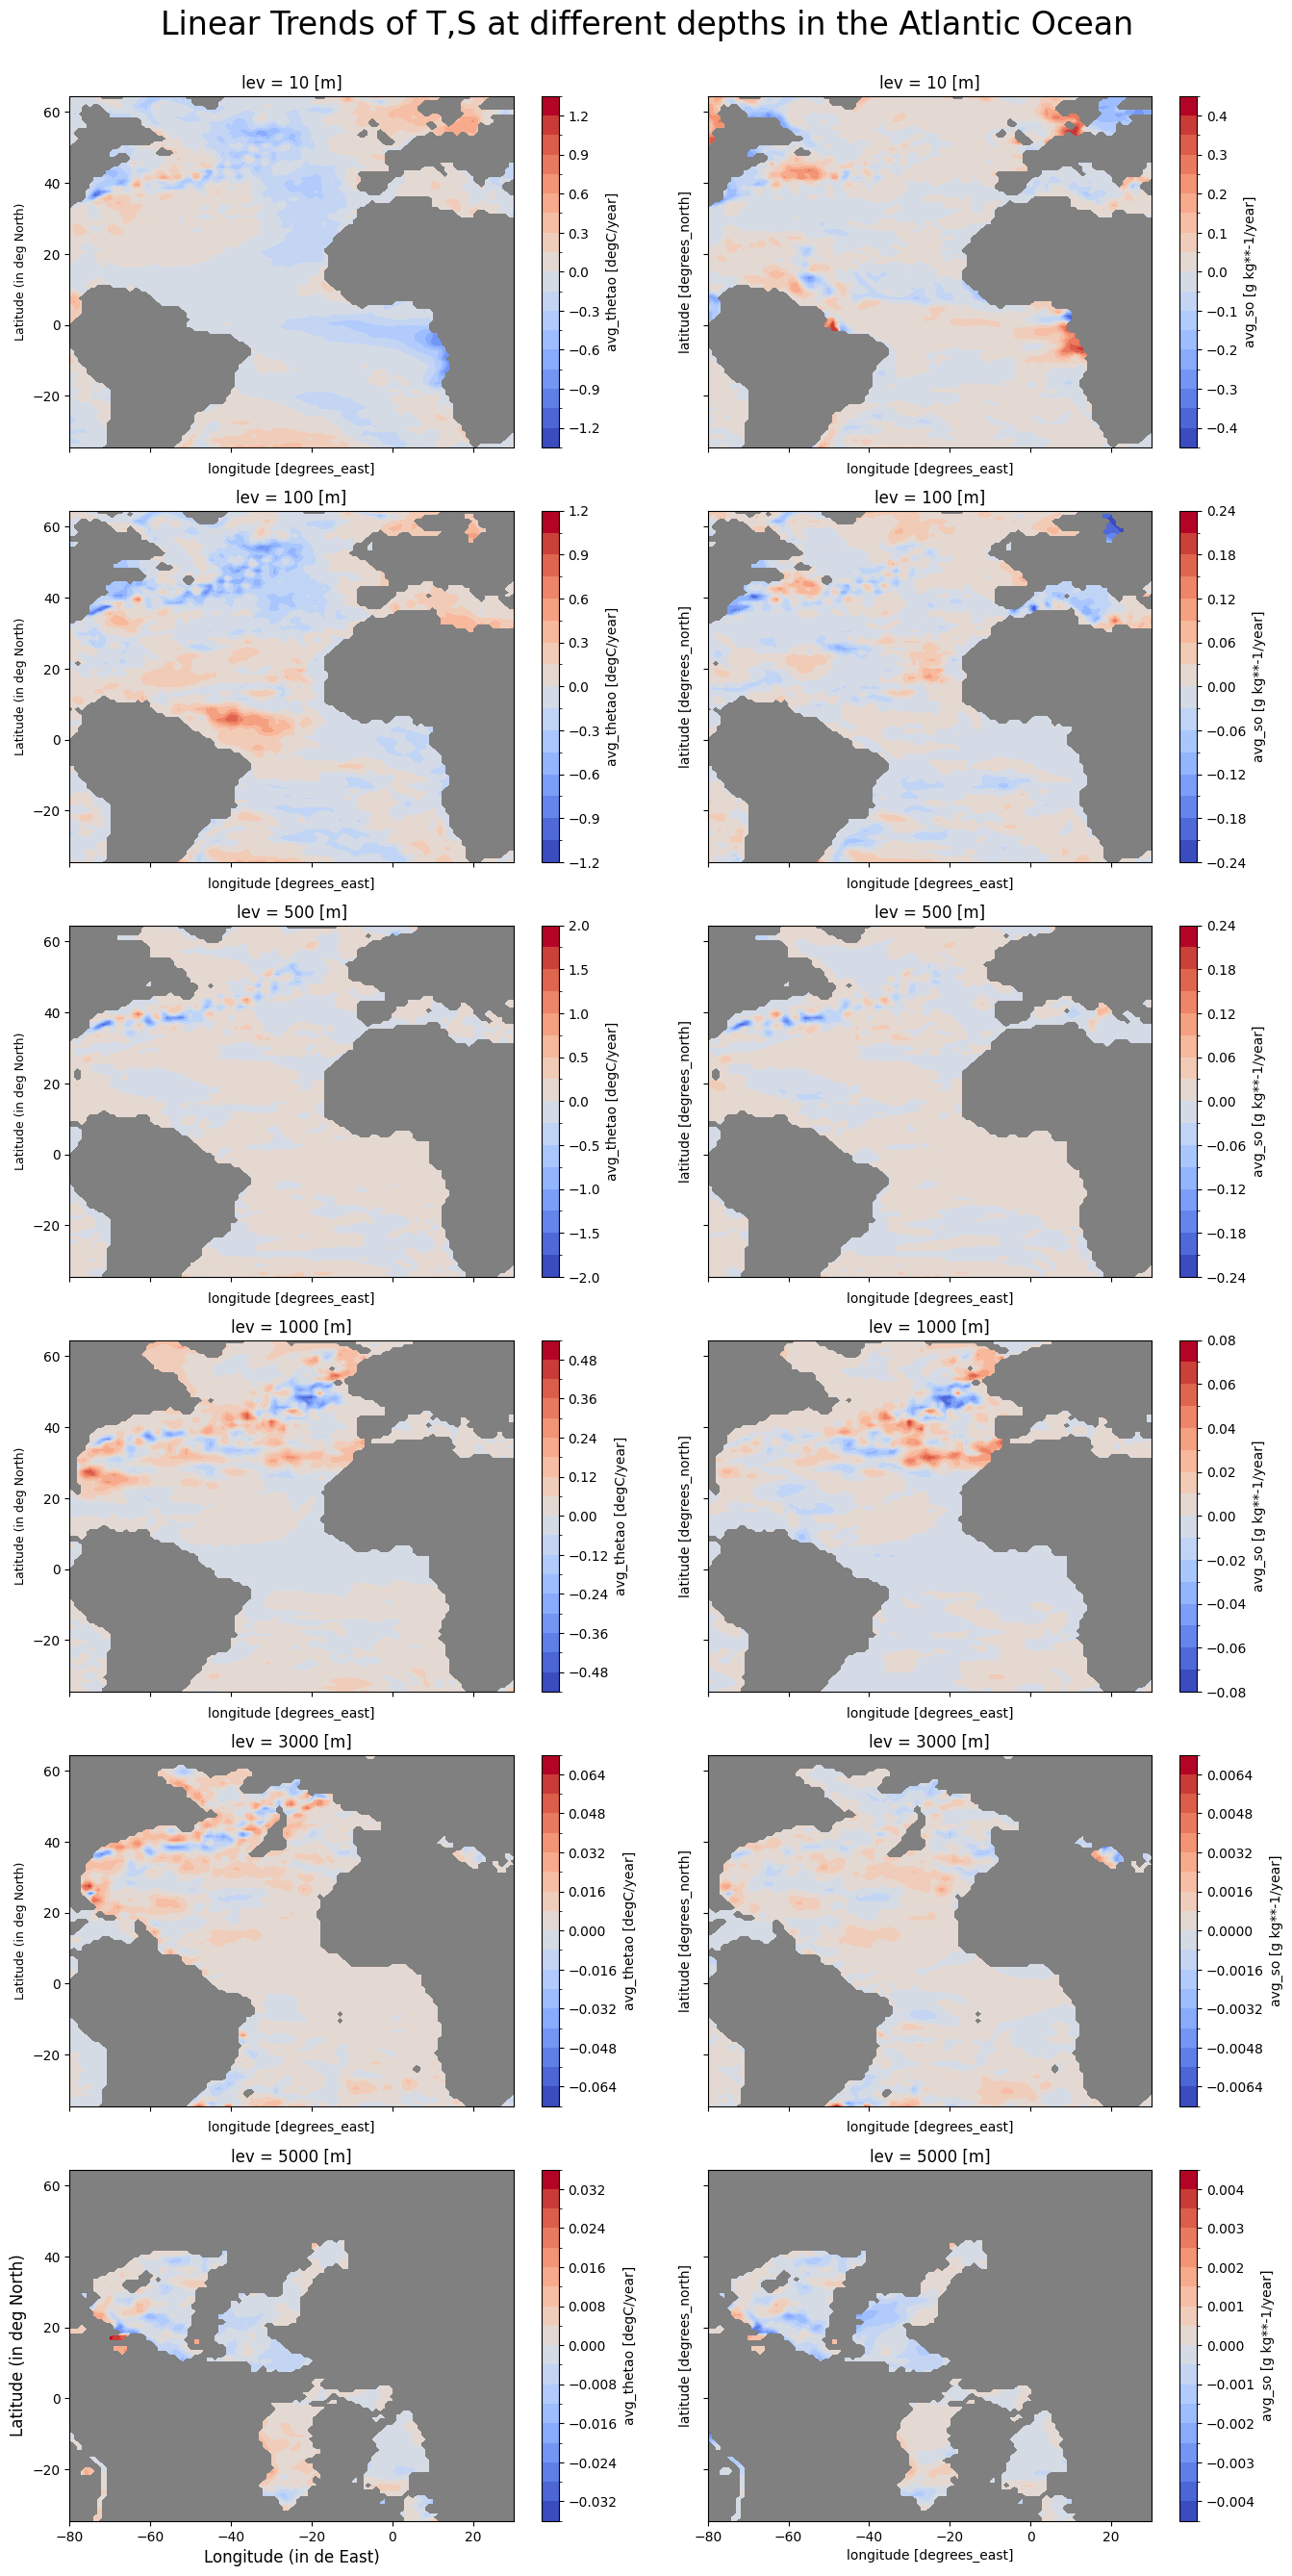

In [19]:
# 58 s
trend = multilevel_trend(o3d_request)
trend.plot()

### zonal_mean_trend_plot

`zonal_mean_trend_plot(o3d_request)`

This function generates **plots of zonally averaged linear trends** in ocean temperature and salinity over time, plotted as a function of depth and latitude for a selected region. It helps to identify latitudinal zones and depths where strong trends or potential drifts are occurring.

#### Key Features:
- **Input**: Ocean 3D data (temperature and salinity) and a region of interest.
- **Output**: Zonally averaged trend plots for the chosen region and depth levels.

<details>
  <summary><strong><span style="color: green;">Click to view the docstring</span></strong></summary>

```python
class zonal_mean_trend:
    """
    Class for generating zonally averaged trend plots from ocean3d data.

    Args:
        o3d_request (object): Object containing necessary data for trend analysis and plotting.

    Attributes:
        - data (xarray.Dataset): The dataset with 3D ocean temperature (avg_thetao) and salinity (avg_so).
        - region (str): The region for spatial averaging or custom lat-lon box.
        - output_dir (str): Directory for storing output figures.
        - loglevel (str): The logging level for messages during execution.

    Methods:
        - `plot()`: Generates the zonally averaged trend plot for ocean temperature and salinity over the selected region.
    """
```
</details>

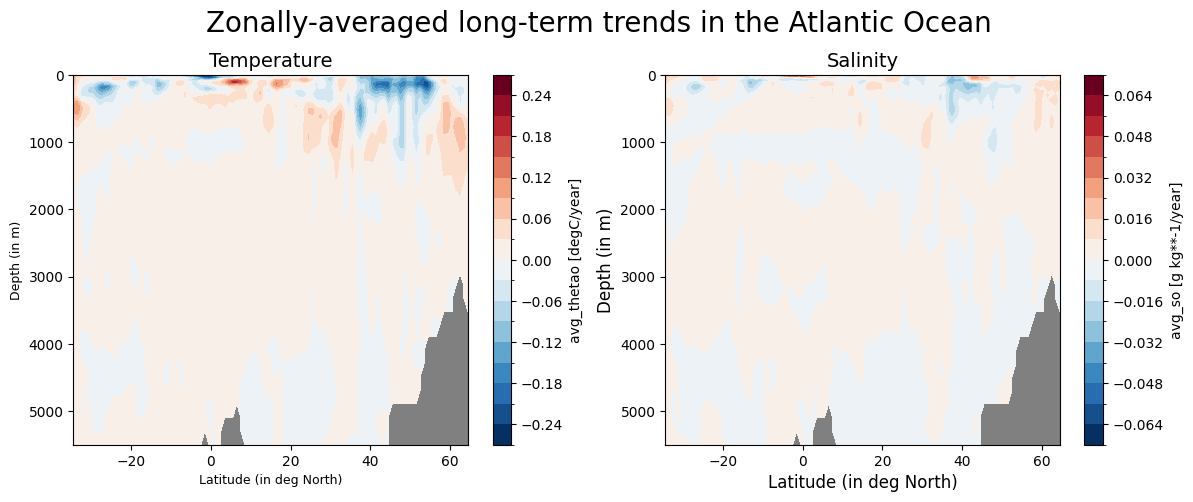

In [20]:
# 34 s
zonal_trend = zonal_mean_trend(o3d_request)
zonal_trend.plot()

## Atmospheric global mean biases diagnostic 

Main authors: 
- Susan Sayed (DWD, susan.sayed@dwd.de)


#### Description
This diagnostic analyzes and visualizes 2D biases for multiple atmospheric fields, primarily comparing them to ERA5 data across different seasons. It identifies significant biases in fields like surface temperature, winds, temperature, and moisture along pressure levels. The diagnostic uses nextGEMS cycle 3 data but supports any data from the catalog through the Low Resolution Archive (LRA).

#### Input Variables
Exemplary variables analyzed by this tool include:
- 2m temperature (`2t`)
- Total Precipitation (`tprate`)
- Zonal and meridional wind (`u`, `v`)
- Temperature (`t`)
- Specific humidity (`q`)

In [27]:
from aqua import Reader

import os, sys
import aqua
sys.path.insert(0, os.path.join(aqua.__path__[0], '../','diagnostics'))
diagnostic_sys_path = sys.path.copy()

In [29]:
from atmglobalmean import seasonal_bias, compare_datasets_plev

Data is retrieved with monthly timesteps and 1x1 degree resolution.

In [33]:
# Loading ERA5 data
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve()

# Loading IFS-NEMO historcal data
reader_ifs_nemo_historical = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
data_ifs_nemo_historical = reader_ifs_nemo_historical.retrieve()

2024-09-06 01:57:27 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-09-06 01:57:27 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-09-06 01:57:27 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-09-06 01:57:27 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-09-06 01:57:27 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-09-06 01:57:27 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


### `seasonal_bias` Function

The **`seasonal_bias`** function is designed to analyze and visualize the bias between two datasets for a given variable over a user-defined time range. It compares the output of a model dataset (e.g., `dataset1`) to a reference dataset (e.g., `dataset2`, typically ERA5 or another model) and calculates the bias across different seasons and/or climatologically. 

This function is highly flexible and allows users to specify a range of options such as the variable to compare, pressure levels, time ranges, and the statistic to compute for bias.

#### Key Functionality:
- **Seasonal and Climatological Bias Maps**: 
  - The default mode (`seasons=True`) generates bias maps for each season (e.g., winter, spring, summer, fall) to show how model biases vary seasonally. A climatological bias map, which averages the bias across the entire time range, is also produced.
  - **When `seasons=False`**: The function generates only a **climatological bias map**, omitting the seasonal breakdown. This is useful when a general overview of bias across the full time range is needed without a focus on individual seasons.
  
- **Bias Statistics**: The function supports several statistical measures to compute bias, including:
  - **Mean**: Calculates the average bias for the time range or season.
  - **Max/Min**: Shows the extreme biases (maximum or minimum) between the datasets.
  - **Difference** (`diff`): Calculates the direct difference between datasets.
  - **Standard Deviation** (`std`): Provides a measure of the variability in bias.

- **Variable and Pressure Level Analysis**:
  - Users can specify the variable they want to compare (e.g., `2t` for 2m temperature, `tprate` for precipitation, etc.).
  - The function allows for comparison at different pressure levels (`plev`), or surface-level variables if no pressure level is specified.


<details>
  <summary> <span style="color: green;"> Click to expand function description and arguments</span></summary>

#### `seasonal_bias` Function:

```python
def seasonal_bias(dataset1=None, dataset2=None, var_name=None,
                  plev=None, statistic="mean",
                  model_label1=None, model_label2=None,
                  start_date1=None, end_date1=None,
                  start_date2=None, end_date2=None,
                  outputdir=None, outputfig=None,
                  dataset2_precomputed=None,
                  loglevel='WARNING', seasons=True, **kwargs):
    '''
    Plot the seasonal bias maps between two datasets for specific variable and time ranges.

    Args:
        dataset1 (xarray.Dataset): The first dataset.
        dataset2 (xarray.Dataset): The second dataset, compared to the first (reference dataset).
        var_name (str): Name of the variable to compare (e.g., '2t', 'tprate').
        plev (float or None): Pressure level in Pa. If None, assumed to be surface level.
        statistic (str): Statistic to calculate for each season ('mean', 'max', 'min', 'diff', 'std'). Default is 'mean'.
        model_label1 (str): Label for the first dataset.
        model_label2 (str): Label for the second dataset.
        start_date1 (str): Start date for dataset1 ('YYYY-MM-DD').
        end_date1 (str): End date for dataset1 ('YYYY-MM-DD').
        start_date2 (str): Start date for dataset2 ('YYYY-MM-DD').
        end_date2 (str): End date for dataset2 ('YYYY-MM-DD').
        outputdir (str): Directory to save output files.
        outputfig (str): Directory to save output figures.
        dataset2_precomputed (xarray.Dataset or None): Precomputed climatology for dataset2.
        loglevel (str): Logging level.
        seasons (bool): If True, plot bias maps for individual seasons. If False, only plot climatological bias.

    Keyword Args:
        nlevels (int): Number of levels for the colorbar. Default is 12.
        vmin (float): Minimum value for the colorbar. Default is None.
        vmax (float): Maximum value for the colorbar. Default is None.

    Raises:
        ValueError: If an invalid statistic is provided.
        NoDataError: If the variable or level is not available in the datasets.

    Returns:
        A seasonal bias plot.
    '''


### 2m Temperature:

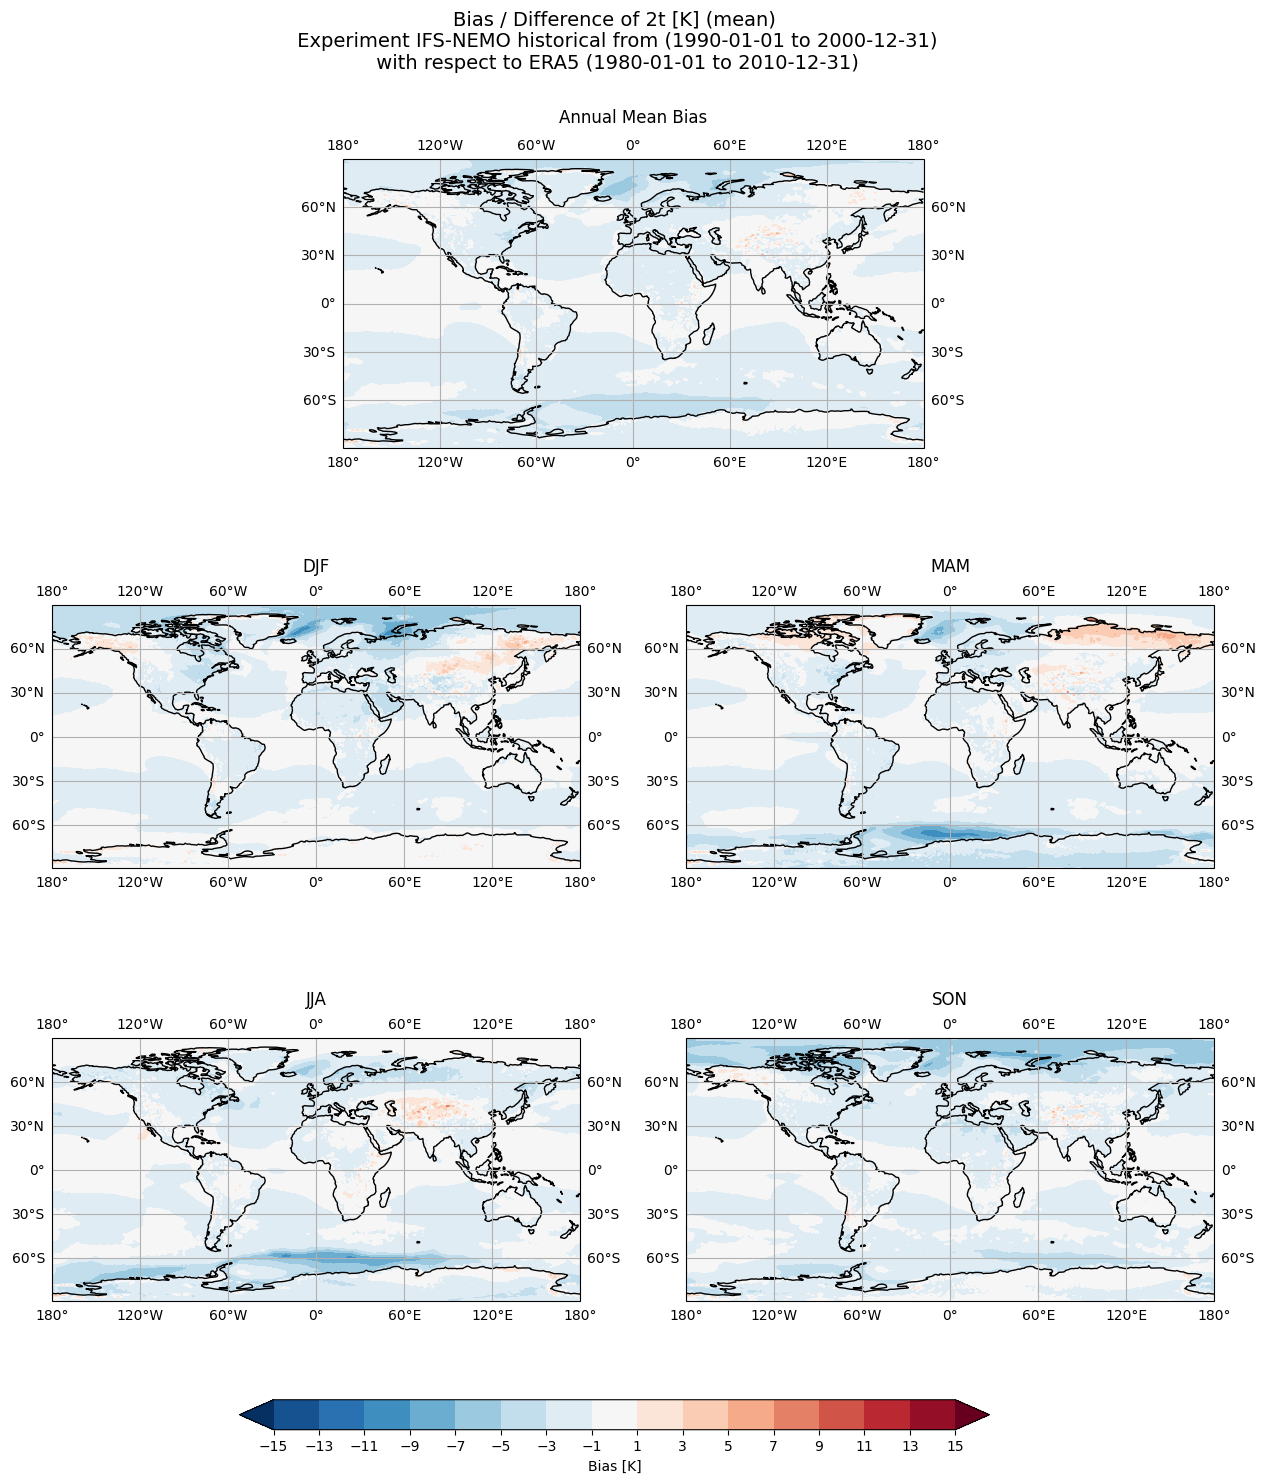

In [34]:
# 40 s
seasonal_bias(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='2t',
    plev=None,
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2000-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )

### `compare_datasets_plev` Function

The **`compare_datasets_plev`** function is designed to compare two datasets (e.g., model outputs or a reference dataset) and generate zonal bias plots for a given variable across vertical pressure levels. This helps visualize how variables like temperature, wind, or humidity differ between the two datasets over a specified time range.

#### Key Functionality:
- **Zonal Bias Comparison**: 
  - The function calculates the bias between two datasets for a specific variable (e.g., `q`, `u`, `v`, `t`) and plots the bias along latitude and pressure levels.
  
- **Pressure Level Analysis**: 
  - Users can define the minimum and maximum pressure levels (`plev_min`, `plev_max`) to focus the analysis on a specific vertical range.

- **Climatology Handling**:
  - The function can use precomputed climatology for faster analysis or compute it directly from the dataset.


<details>
  <summary><span style="color: green;">Click to expand function description and arguments</span></summary>

#### `compare_datasets_plev` Function:

```python
def compare_datasets_plev(dataset1=None, dataset2=None, var_name=None,
                          start_date1=None, end_date1=None,
                          start_date2=None, end_date2=None,
                          model_label1=None, model_label2=None,
                          outputdir=None, outputfig=None,
                          dataset2_precomputed=None, loglevel='WARNING',
                          plev_min=None, plev_max=None,
                          **kwargs):
    """
    Compare two datasets and plot the zonal bias for a selected model time range with respect to the second dataset.

    Args:
        dataset1 (xarray.Dataset): The first dataset.
        dataset2 (xarray.Dataset): The second dataset.
        var_name (str): The variable name to compare (examples: q, u, v, t)
        start_date1 (str): The start date of the time range for dataset1 in 'YYYY-MM-DD' format.
        end_date1 (str): The end date of the time range for dataset1 in 'YYYY-MM-DD' format.
        start_date2 (str): The start date of the time range for dataset2 in 'YYYY-MM-DD' format.
        end_date2 (str): The end date of the time range for dataset2 in 'YYYY-MM-DD' format.
        model_label1 (str): The label for the first model.
        model_label2 (str): The label for the second model.
        outputdir (str): The directory to save the output files.
        outputfig (str): The directory to save the output figures.
        dataset2_precomputed (xarray.Dataset or None): Pre-computed climatology for dataset2.
        loglevel (str): The desired level of logging. Default is 'WARNING'.
        plev_min (float or None): The minimum pressure level in Pa. Default is None.
        plev_max (float or None): The maximum pressure level in Pa. Default is None.

    Keyword Args:
        nlevels (int): The number of levels for the colorbar. Default is 12.
        vmin (float): The minimum value for the colorbar. Default is None.
        vmax (float): The maximum value for the colorbar. Default is None.

    Returns:
        A zonal bias plot.
    """


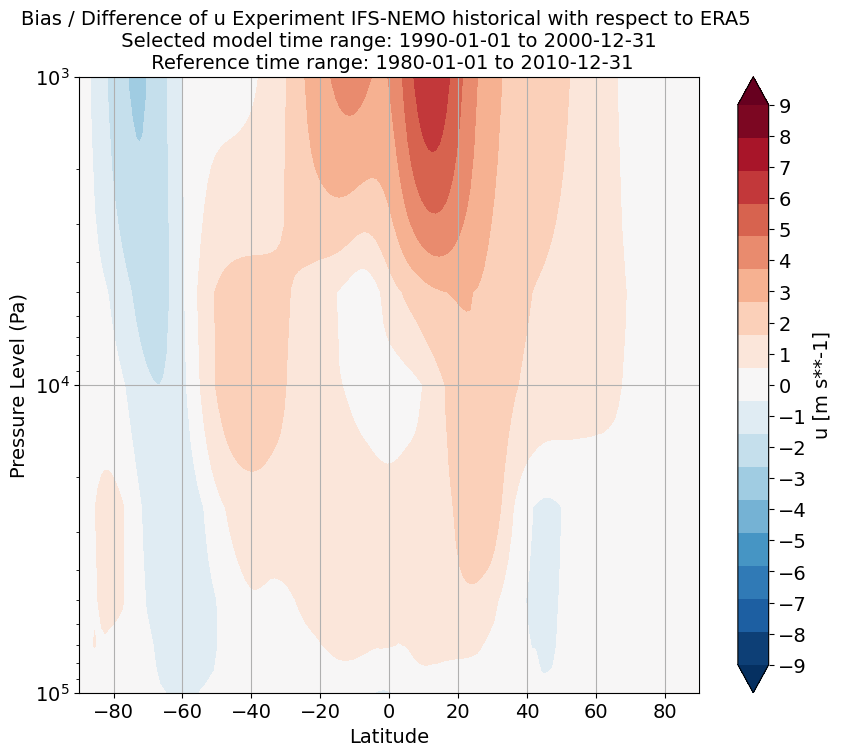

In [36]:
# 2 m, 32 s 
compare_datasets_plev(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='u',
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2000-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    plev_min = 1000,
    plev_max = 100000,
    vmin = -9,
    vmax = 9
    )